# U.S. Medical Insurance Costs
A self-guided project as part of the __[codecademy.com](https://codecademy.com)__ course __[Data Scientist: Analytics Specialist](https://www.codecademy.com/learn/paths/data-analyst)__. This project was done at a point in the course where dataframes and the Pandas library was not yet introduced, therefore it employs "basic" Python for analysis. This notebook intentionally breaks with the __[PEP 8](https://peps.python.org/pep-0008/#maximum-line-length)__ recommendation of a maximum line-length of 79 characters. I maintain that adhering to this recommendation in a Jupyter Notebook actually reduces readability.

In [1]:
import csv
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

# Align tables to the left
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

## Problem Description and Goal
> "The health-care sector is in many ways the most consequential part of the United States economy. It is a fundamental part of people’s lives, supporting their health and well-being [...] and health care is one of the largest categories of consumer spending (8.1 percent of consumer expenditures; BLS 2019a)" __[(Brookings Report: A dozen facts about the economics of the US health-care system)](https://www.brookings.edu/research/a-dozen-facts-about-the-economics-of-the-u-s-health-care-system/)__.

Health and well-being are undoubtedly an important goal for individuals. However, these aspects of life do not come for free, they have to be actively worked towards and professional health care comes at a cost: the cost of individual medical costs billed by health insurance. Data analysis can provide valuable insights about this part of the U.S. economy and the individuals being affected. 
<div class="alert alert-block alert-success">
The goal of this analysis is to descriptively and exploratively scrutinize the variables and cases in a dataset about U.S. medical insurance costs and draw conclusions about possible insight to be gained by the contained data. <b> The basic question every variable will be subjected to is: Is the variable a good prospect for further analysis in respect to medical cost?</b> 
</div>

## Document Overview
1. [Problem Description and Goal](#Problem-Description-and-Goal)
2. [Data: Formal Aspects and Structure of the Dataset by Visual and In-Code Inspection](#Data:-Formal-Aspects-and-Structure-of-the-Dataset-by-Visual-and-In-Code-Inspection)  
    2.1 [Medical Cost](#Medical-Cost)  
    2.2 [Additional Variables](#Additional-Variables)
3. [Analysis](#Analysis)  
    3.1 [Numerical Variables in Respect to Medical Cost](#Numerical-Variables-in-Respect-to-Medical-Cost)  
    3.2 [Categorical Values in Relation to Medical Cost](#Categorical-Values-in-Relation-to-Medical-Cost)
4. [Conclusion](#Conclusion)

## Data: Formal Aspects and Structure of the Dataset by Visual and In-Code Inspection
The dataset chosen to gain insights about U.S. medical insurance costs is named "Medical Cost Personal Datasets" and available on __[Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)__. According to the owner of the dataset on Kaggle the data came from a public domain source, and was cleaned up and recoded. Unfortunately, the author does not provide a source nor information about the kind of transformation that was applied to the data. The reference to U.S. medical insurance is implied, but not explicitly stated.
<div class="alert alert-block alert-warning">
The author of the dataset does not adequately provide a source for the data. Therefore, it is impossible to verify the integrity and accuracy of the contained data, nor is it possible to scrutinize the quality of data collection. This is a major caveat for any subsequent findings.
</div>

### Visual Inspection
The dataset has the form of a CSV-File with 8 columns (variables/features). The data is laid out in the following structure:

| Column Name | Data Type             | Variable Type |
|-------------|-----------------------|---------------|
| age         | numerical; discrete   | integer       |
| sex         | categorical; nominal  | string        |
| bmi         | numerical; continuous | float         |
| children    | numerical; discrete   | integer       |
| smoker      | categorical; nominal  | string        |
| region      | categorical; nominal  | string        |
| charges     | numerical; continuous | float         |

Further information about the columns can be found on __[the datasets Kaggle page](https://www.kaggle.com/datasets/mirichoi0218/insurance)__.

### In-Code Inspection

In [28]:
# Creating a "fake" dataframe by creating a nested dict of structure {"id": {"row"}}
# Reason: This projects preceeds the introduction of pandas dataframes

mic_df = {}
df_id = 0

with open('insurance.csv', newline='') as insurance_csv:
    insurance_reader = csv.DictReader(insurance_csv)
    for row in insurance_reader:
        mic_df[df_id] = row
        df_id += 1

In [3]:
print(f'The dataset has {len(mic_df)} rows (records/observations).')

The dataset has 1338 rows (records/observations).


In [29]:
no_missing_values = True
for id, row in mic_df.items():
    for key in row.keys():
        if not row[key]:
            print(f'The dataframe has a missing value for the key {key} in row {id}.')
            no_missing_values = False
if no_missing_values: 
    print("The dataset has no implicitly (empty) missing values.")

The dataset has no implicitly (empty) missing values.


<div class="alert alert-block alert-info">
While the missing attribution (source) of the dataset is a major flaw, the data itself has no implicitly missing values and is well-structured for analysis.
</div>

## Analysis
While there is a variety of insight to be gained about the dataset (e.g., average age of the patients, origin of the majority of the individuals) the focus of this project is the U.S. medical insurance market, specifically the individual medical costs billed by health insurance. For this reason, all the available data will explicitly and solely be viewed in relation to medical cost[<sup>1</sup>](#fn1). From this perspective, the data can be grouped in three categories:
1. Focal point: medical cost
2. Numerical data: age, bmi, children
3. Categorical data: sex, smoker and region

Extensive descriptive analysis will only be run on medical cost itself. For every other variable, checks for possible skewing values like outliers are sufficient.
***
<span id="fn1"> <sup>1</sup> The dataset does not fulfill the criteria for inferential statistics. However, the mentioned relationship may open possible avenues of further investigation, while the individual descriptive distribution is next to meaningless. </span>

### Descriptive Analysis
#### Medical Cost

In [17]:
# Create a list of just the charges
charges_list = [float(value['charges']) for (key,value) in mic_df.items()]
# Show different descriptive statistics about charges
print(f' The statistical mean of all individual medical costs billed by health insurance (charges) is:{statistics.fmean(charges_list): .2f}.')
print(f' The statistical median of all individual medical costs billed by health insurance (charges) is:{statistics.median(charges_list): .2f}.')

 The statistical mean of all individual medical costs billed by health insurance (charges) is: 13270.42.
 The statistical median of all individual medical costs billed by health insurance (charges) is: 9382.03.


There seems to be a discrepancy between the mean and the median, which is a hint at the distribution being skewed, or having outliers. A clearer picture can be obtained by looking at the histogram of charges.

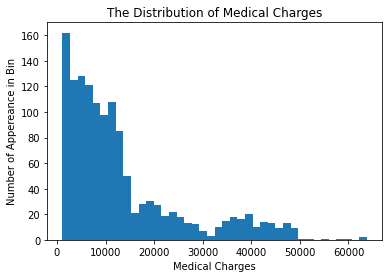

In [6]:
# Bins have been chosen by optical analysis
plt.hist(charges_list, bins=40)
plt.xlabel('Medical Charges')
plt.ylabel('Number of Appereance in Bin')
plt.title("The Distribution of Medical Charges")
plt.show()

The distribution of medical charges is heavily right-skewed. This explains the mean being higher than the median. No considerable outliers can be seen. One can read from the histogram that the majority of people in the dataset pay comparably low medical insurance charges. A somewhat medium block pays higher charges, while very few pay comparably high charges. It will be interesting to see if the dataset holds variables which can hint at explanations for the makeup of the distribution.

#### Additional Variables

To prepare exploratory analysis with the focal point of medical insurance cost, the distribution of the remaining variables will be scrutinized. The goal is to check for possible over-representation and therefore caveats in the exploratory analysis. To not bloat the analysis, this will be done by a simple comparison of median to mean as a quick indicator for skewedness. Compare this discussion at __[StackExchange](https://stats.stackexchange.com/a/455960)__. The closer this value will be to 1, the more evenly distributed the, well, distribution. For comparison, the ratio for the right-skewed distribution of medical charges is 0.71.

In [20]:
# Starting with the numerical data, creating a list for each one and calculating the median/mean ratio.
age_list = [int(value['age']) for (key,value) in mic_df.items()]
print(f'The median to mean ratio of the age distribution in the dataset is:{statistics.median(age_list) / statistics.fmean(age_list) : .2f}.')
bmi_list = [float(value['bmi']) for (key,value) in mic_df.items()]
print(f'The median to mean ratio of the BMI distribution in the dataset is:{statistics.median(bmi_list) / statistics.fmean(bmi_list) : .2f}.')
children_list = [int(value['children']) for (key,value) in mic_df.items()]
print(f'The median to mean ratio of the children distribution in the dataset is:{statistics.median(children_list) / statistics.fmean(children_list) : .2f}.')

The median to mean ratio of the age distribution in the dataset is: 0.99.
The median to mean ratio of the BMI distribution in the dataset is: 0.99.
The median to mean ratio of the children distribution in the dataset is: 0.91.


All numerical distributions having a close to 1 median/mean ratio warrants to further scrutiny of these variables. The categorical variables can be described by simple ratios.

In [21]:
sex_list = [value['sex'] for (key,value) in mic_df.items()]
sex_count_female = sex_list.count('female')
sex_count_male = sex_list.count('male')

print(f'The dataset contains records of {sex_count_female} females at\
{sex_count_female/len(mic_df) * 100: .2f}%.')
print(f'The dataset contains records of {sex_count_male} males at\
{sex_count_male/len(mic_df) * 100: .2f}%.')

The dataset contains records of 662 females at 49.48%.
The dataset contains records of 676 males at 50.52%.


An expected ratio, warranting no further investigation.

In [9]:
smoker_list = [value['smoker'] for (key,value) in mic_df.items()]
non_smoker_count = smoker_list.count('no')
smoker_count = smoker_list.count('yes')

print(f'The dataset contains records of {non_smoker_count} non smokers at{non_smoker_count/len(mic_df) * 100: .2f}%.')
print(f'The dataset contains records of {smoker_count} smokers at{smoker_count/len(mic_df) * 100: .2f}%.')

The dataset contains records of 1064 non smokers at 79.52%.
The dataset contains records of 274 smokers at 20.48%.


According to the __[CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm)__, in 2020 12.5% of the adult U.S. population were smokers. Since the dataset currently being analyzed is undated, a direct comparison is no possible. Since the values are not too far apart, no further investigation will be done.

In [10]:
region_list = [value['region'] for (key,value) in mic_df.items()]
unique_regions = list(set(region_list))
for region in unique_regions:
    region_count = region_list.count(region)
    print(f'The dataset contains records of {region_count} people living in the region of {region} at {region_count/len(mic_df) * 100: .2f}%.')

The dataset contains records of 324 people living in the region of northeast at  24.22%.
The dataset contains records of 325 people living in the region of southwest at  24.29%.
The dataset contains records of 364 people living in the region of southeast at  27.20%.
The dataset contains records of 325 people living in the region of northwest at  24.29%.


Since the __[United States Census Bureau](https://www.census.gov/popclock/print.php?component=growth&image=//www.census.gov/popclock/share/images/growth_1561939200.png)__ works with the differing categories Northeast, Midwest, West and South, this data is hard to cross-reference. Since the distribution is very homogenous, it might also be a result of __[stratified random sampling](https://en.wikipedia.org/wiki/Stratified_sampling)__. Another reminder of the shortcomings of the dataset, which missing annotations and source make it impossible to scrutinize.


<div class="alert alert-block alert-info">
The descriptive analysis revealed the right-skewed nature of the distribution of medical charges. Reasons for the makeup of the distribution should be produced by further analysis. Every other variable in the dataset seems to be "behaving" as excepted in reference to the general U.S. population, and therefore can be subsequently explored in relation to medical charges.
</div>

### Exploratory Analysis
#### Numerical Variables in Respect to Medical Cost

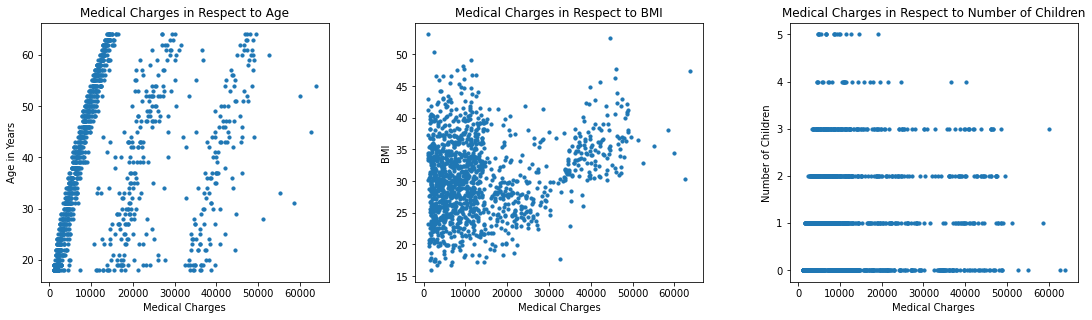

In [26]:
# Set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.5,
                    top=1,
                    wspace=0.3,
                    hspace=0.2)
# Plot Medical Charges in Respect to Age
plt.subplot(1, 3, 1)
plt.scatter(charges_list, age_list, s=10, marker='o')
plt.xlabel('Medical Charges')
plt.ylabel('Age in Years')
plt.title("Medical Charges in Respect to Age")
# Plot Medical Charges in Respect to BMI
plt.subplot(1, 3, 2)
plt.scatter(charges_list, bmi_list, s=10, marker='o')
plt.xlabel('Medical Charges')
plt.ylabel('BMI')
plt.title("Medical Charges in Respect to BMI")
# Plot Medical Charges in Respect to Number of Children
plt.subplot(1, 3, 3)
plt.scatter(charges_list, children_list, s=10, marker='o')
plt.xlabel('Medical Charges')
plt.ylabel('Number of Children')
plt.title("Medical Charges in Respect to Number of Children")
# Show the final plot
plt.show()

From left to right:
- It would be interesting to analyze the reason for the optical brackets in "Medical Charges in Respect to Age". While age itself doesn't seem to be a very influential variable, there seem to be three distinct brackets of people in respects to the height of the medical charge.
- "Medical Charges in Respect to BMI" seems to be a good prospect for further analysis. A linear regression would be a good method to see if the upwards trend is "more than optical"
- Medical Charges in Respect to Number of Children doesn't hint at a need for further analysis in respects to medical cost



#### Categorical Values in Relation to Medical Cost

In [30]:
def produce_average_cost(comparison_list):
    cost_sums = {}
    cost_means = {}
    # Sum up all the individual charges from the list of charges respective to the value in the given list of categorical values
    for i in range(0, len(charges_list)):
        cost_sums[comparison_list[i]] = cost_sums.get(comparison_list[i], 0) + charges_list[i]
    # Produce the average cost by using the result of the last step
    for key in cost_sums:
        cost_means[key] = round(cost_sums[key] / comparison_list.count(key), 2)
    return cost_means

categorical_variables = {"sex": sex_list, "smoker": smoker_list, "region": region_list}
for categorical_variable, categorical_variables_list in categorical_variables.items():
    print(f'The average medical insurance cost for the variable {categorical_variable} split according to its possible values is {produce_average_cost(categorical_variables_list)}.')

The average medical insurance cost for the variable sex split according to its possible values is {'female': 12569.58, 'male': 13956.75}.
The average medical insurance cost for the variable smoker split according to its possible values is {'yes': 32050.23, 'no': 8434.27}.
The average medical insurance cost for the variable region split according to its possible values is {'southwest': 12346.94, 'southeast': 14735.41, 'northwest': 12417.58, 'northeast': 13406.38}.


A visualization of the categorical variables in relation to medical charges makes it easier to comprehend them:

(I would be grateful if someone could hint me at how to produce such a graphic in Matplotlib or a similar framework, for I could not figure it out and had to resort to manual creation.)

![title](img/categorical_variables.png)

All three categorical variables warrant further inspection. Especially the value of smoker has a visually significant impact on the average medical insurance cost.

<div class="alert alert-block alert-info">
The exploratory analysis put the numerical, as well as the categorical variables in relation to medical cost. In respect to the numerical variables, the analysis reveals one good candidate for further investigation by regressional analysis: "Medical Charges in Respect to BMI" and one candidate for general scrutiny in respect to visual brackets: "Medical Charges in Respect to Age". Regarding the categorical variables, all three afford further analysis, with the smoking-status of individuals having the highest impact-factor on average medical insurance cost.
</div>

## Conclusion

The goal of this notebook was to descriptively and exploratively scrutinize the given dataset. Every variable was discussed in relation to the basic question: "Is the variable a good prospect for further analysis in respect to medical cost?". The two most striking variables in relation to average medical charges were BMI and smoker-status. More powerful further analysis (e.g. regressional analysis, inferential statistics) could produce insight on the factuality, strength and generalizability of found insights. The source and quality of the dataset would have to be determined preceding any such analysis.